In [14]:
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

wine_quality = fetch_ucirepo(id=186) 
  
X = wine_quality.data.features 
y = wine_quality.data.targets 

print(wine_quality.variables) 

                    name     role         type demographic  \
0          fixed_acidity  Feature   Continuous        None   
1       volatile_acidity  Feature   Continuous        None   
2            citric_acid  Feature   Continuous        None   
3         residual_sugar  Feature   Continuous        None   
4              chlorides  Feature   Continuous        None   
5    free_sulfur_dioxide  Feature   Continuous        None   
6   total_sulfur_dioxide  Feature   Continuous        None   
7                density  Feature   Continuous        None   
8                     pH  Feature   Continuous        None   
9              sulphates  Feature   Continuous        None   
10               alcohol  Feature   Continuous        None   
11               quality   Target      Integer        None   
12                 color    Other  Categorical        None   

               description units missing_values  
0                     None  None             no  
1                     None  Non

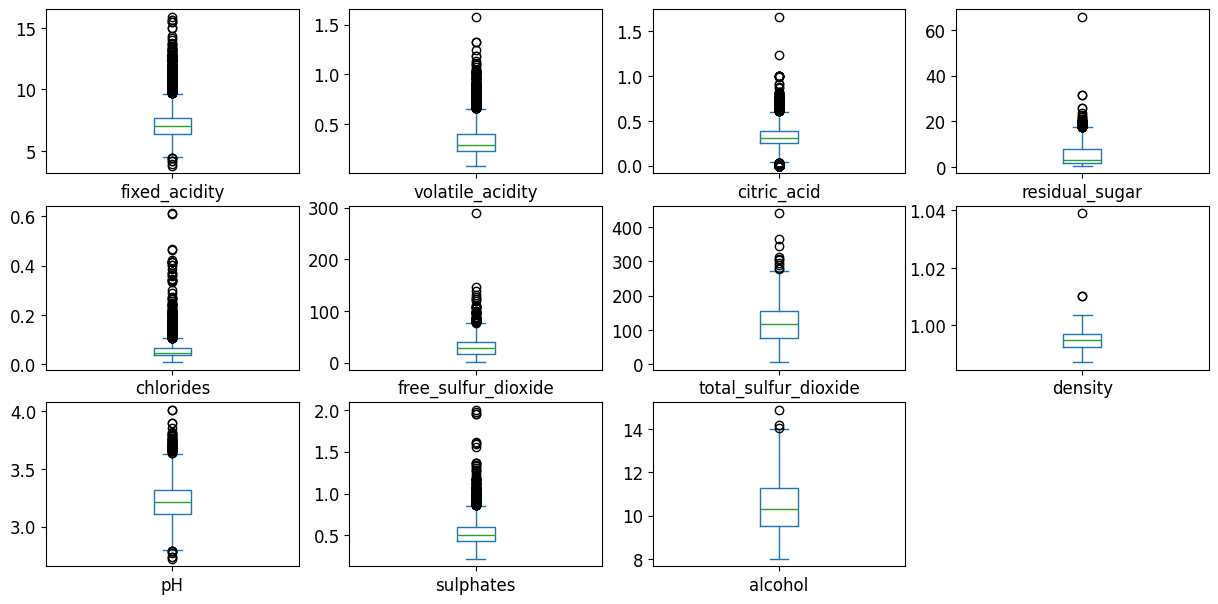

In [15]:
data_mean = X.iloc[:, :]
data_mean.plot(kind='box', subplots=True, layout=(8,4), sharex=False,
sharey=False, fontsize=12, figsize=(15,20));

In [16]:
outlier_indices = set()
for column in data_mean.columns:
  Q1 = data_mean[column].quantile(0.25)
  Q3 = data_mean[column].quantile(0.75)
  IQR = Q3 - Q1
  
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  
  outliers = data_mean[(data_mean[column] < lower_bound) | (data_mean[column] > upper_bound)].index
  outlier_indices.update(outliers)

  outliers_sum = ((data_mean[column] < lower_bound) | (data_mean[column] > upper_bound)).sum()
  print(f'{column}: {outliers_sum} outliers')

outlier_indices = list(outlier_indices)

outlier_rm_x = data_mean.drop(index=outlier_indices).reset_index(drop=True)
outlier_rm_y = y.drop(index=outlier_indices).reset_index(drop=True)

fixed_acidity: 357 outliers
volatile_acidity: 377 outliers
citric_acid: 509 outliers
residual_sugar: 118 outliers
chlorides: 286 outliers
free_sulfur_dioxide: 62 outliers
total_sulfur_dioxide: 10 outliers
density: 3 outliers
pH: 73 outliers
sulphates: 191 outliers
alcohol: 3 outliers


<Axes: >

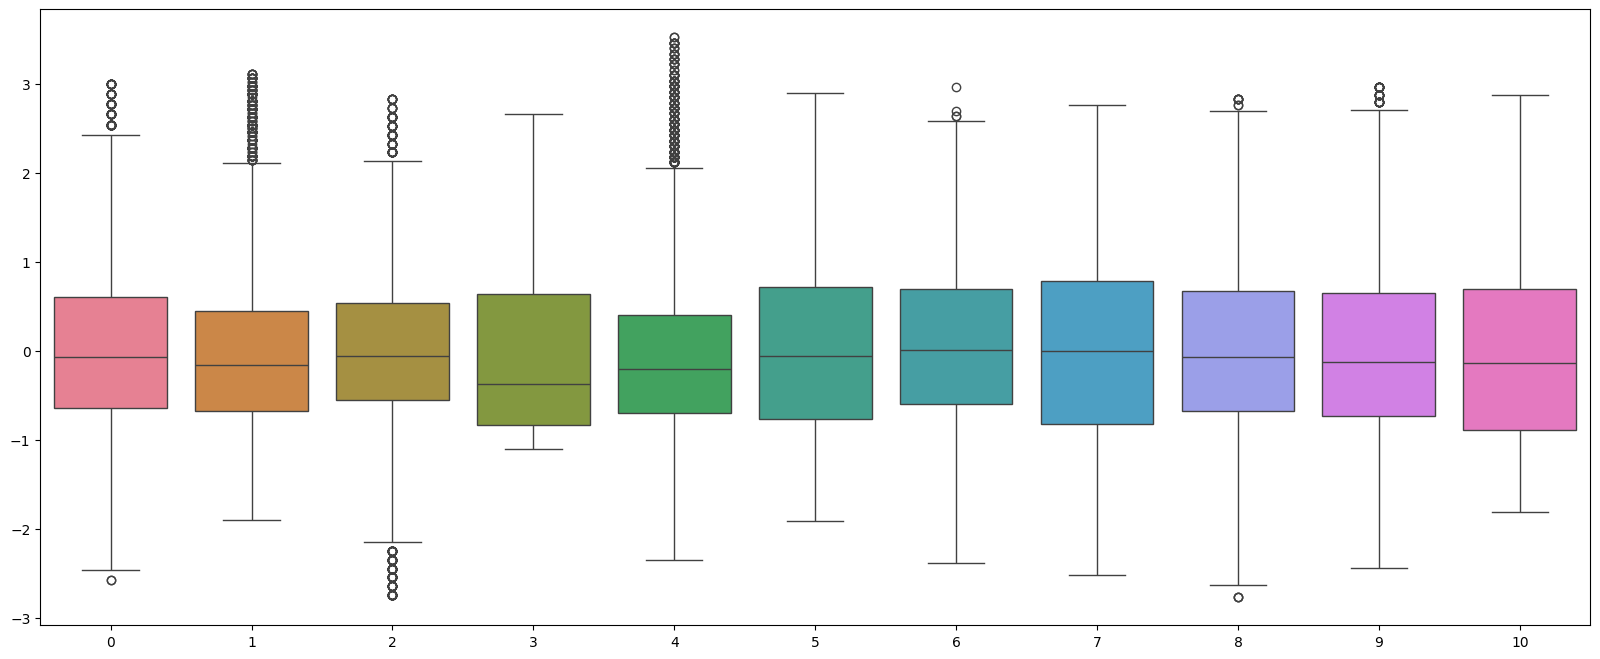

In [17]:
scaler = StandardScaler()
Xs = scaler.fit_transform(outlier_rm_x)

fig,ax=plt.subplots(1,figsize=(20,8))
sns.boxplot(data=Xs,ax=ax)

In [18]:
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, outlier_rm_y.values.ravel(), test_size=0.2,random_state=1, stratify=outlier_rm_y)

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=1)
scores = cross_val_score(tree_clf, Xs_train, y_train, cv=4, scoring='accuracy')

mean_score = np.mean(scores)

tree_clf.fit(Xs_train, y_train)
test_score = tree_clf.score(Xs_test, y_test)

print("mean cross validation accuracy: {:03.2f}".format(mean_score))
print("test accuracy: {:03.2f}".format(test_score))


mean cross validation accuracy: 0.58
test accuracy: 0.59
